# Image Analysis python code for Sam Hadley final year university project



## Version 1

## Converts images in current directory to grayscale, displays the histogram of grayscale image & it's stats, saves histogram images and saves data to CSV file.




flatcross in rack.jpg


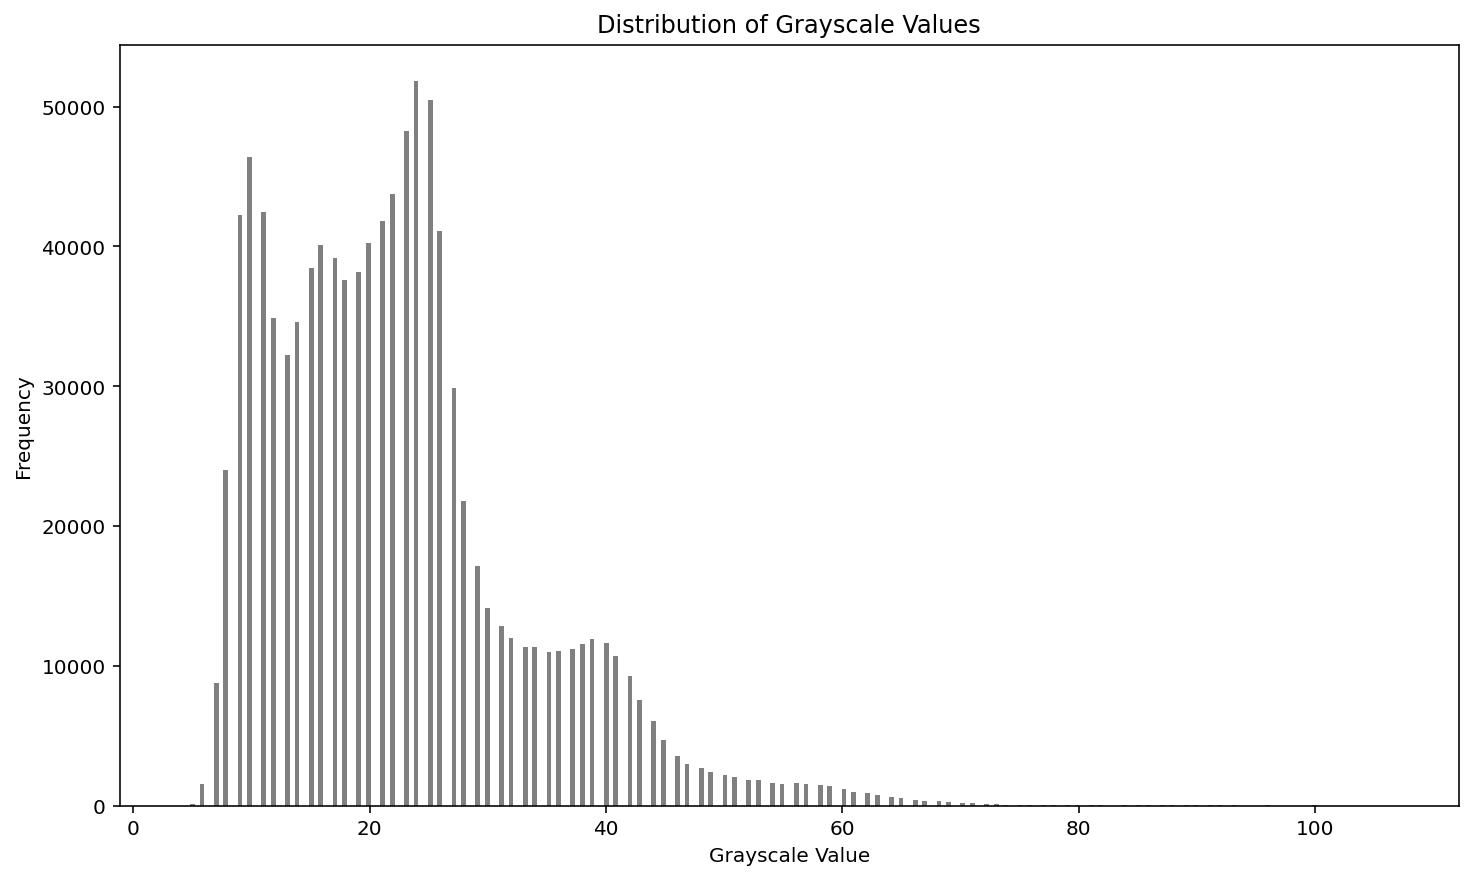

Mean is 22.39540241693682
Min is 4
Max is 107
StdDev is 10.769632235212576

Bead in rack.jpg


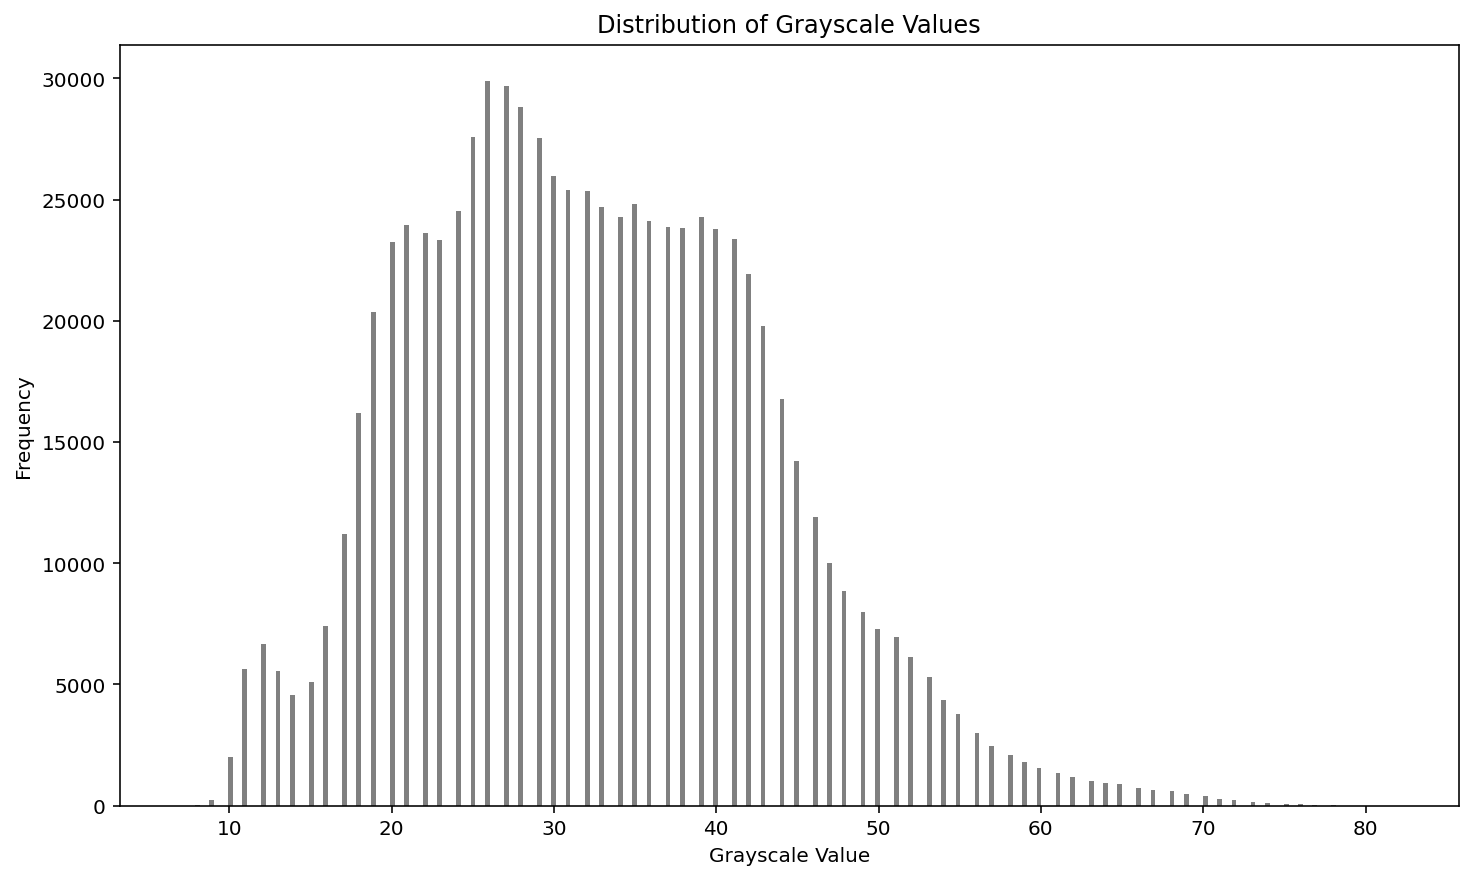

Mean is 32.53018152060705
Min is 7
Max is 82
StdDev is 10.84602947421928


In [8]:
import csv
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

# csv filename
filename = "exported-data.csv"

# Column headers
headers = ["Filenames", "Mean", "Min", "Max", "StdDev"]

# Get list of files in current directory
files = os.listdir()

# List of image file paths
image_files = [
    file for file in files if os.path.isfile(file) and file.endswith(".jpg")
]

# make array to store images
images = []

# arrays to store mean, min,max and std
means = np.array([])
mins = np.array([])
maxs = np.array([])
stds = np.array([])
filenames = np.array([])

# load images into array
for file in image_files:
    img = Image.open(file)
    images.append(img)

# loop through images array and work out stats
for image in images:

    print(f"\n{image.filename}")

    # Convert to grayscale
    grayscale_image = np.array(image.convert('L'))

    # Plot the distribution of grayscale values
    plt.hist(grayscale_image.flatten(), bins=256, color='gray')
    plt.xlabel('Grayscale Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Grayscale Values')
    plt.show()

    filenames = np.append(filenames, image.filename)
    means = np.append(means, np.mean(grayscale_image))
    mins = np.append(mins, np.min(grayscale_image))
    maxs = np.append(maxs, np.max(grayscale_image))
    stds = np.append(stds, np.std(grayscale_image))

    print(f"Mean is {np.mean(grayscale_image)}")
    print(f"Min is {np.min(grayscale_image)}")
    print(f"Max is {np.max(grayscale_image)}")
    print(f"StdDev is {np.std(grayscale_image)}")

    # Save histogram as jpg
    plt.savefig(image.filename + "_histogram.jpg")
    plt.close()

# Create a DataFrame
data = {
    "Filenames": filenames,
    "Mean": means,
    "Min": mins,
    "Max": maxs,
    "StdDev": stds
}
df = pd.DataFrame(data)

# Appending to the csv file
with open(filename, 'w', newline='') as csvfile:
    # Creating a csv writer object
    csvwriter = csv.writer(csvfile, delimiter=",")
    # Writing the column headers
    csvwriter.writerow(headers)

df.to_csv(filename, index=False)

## Version 2

## Converts images in current directory to grayscale, saves histogram image files and data \(stats\) to CSV file.



In [2]:
import csv
import os

import numpy as np
from PIL import Image
import pandas as pd

# csv filename
filename = "exported-data.csv"

# Column headers
headers = ["Filenames", "Mean", "Min", "Max", "StdDev"]

# Get list of files in current directory
files = os.listdir()

# List of image file paths
image_files = [
    file for file in files if os.path.isfile(file) and file.endswith(".jpg")
]

# make array to store images
images = []

# arrays to store mean, min,max and std
means = []
mins = []
maxs = []
stds = []
filenames = []

# load images into array
for file in image_files:
    img = Image.open(file)
    images.append(img)

# loop through images array and work out stats
for image in images:
    grayscale_image = np.array(image.convert('L'))

    filenames.append(image.filename)
    means.append(np.mean(grayscale_image))
    mins.append(np.min(grayscale_image))
    maxs.append(np.max(grayscale_image))
    stds.append(np.std(grayscale_image))

# Create a DataFrame
data = {
    "Filenames": filenames,
    "Mean": means,
    "Min": mins,
    "Max": maxs,
    "StdDev": stds
}
df = pd.DataFrame(data)

# Appending to the csv file
with open(filename, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=",")
    csvwriter.writerow(headers)

df.to_csv(filename, index=False)

### 3rd revision

Less code, optimised 

In [5]:
import os
import numpy as np
from PIL import Image
import pandas as pd

# csv filename
filename = "exported-data.csv"

# Get list of image files in current directory
# os.scandir() more efficient function than os.listdir()
# image_files = [file for file in os.listdir() if os.path.isfile(file) and file.endswith(".jpg")]
image_files = [file.name for file in os.scandir() if file.is_file() and file.name.endswith(".jpg")]

# Calculate statistics for each image
data = []
for file in image_files:
    img = Image.open(file).convert('L')
    grayscale_image = np.array(img)

    data.append({
        "Filenames": file,
        "Mean": np.mean(grayscale_image),
        "Min": np.min(grayscale_image),
        "Max": np.max(grayscale_image),
        "StdDev": np.std(grayscale_image)
    })

# Create a DataFrame
df = pd.DataFrame(data)

# Write data to the CSV file
df.to_csv(filename, index=False)


### 4th revision

Not using pandas

In [3]:
import os
import numpy as np
from PIL import Image
import csv

# csv filename
filename = "exported-data.csv"

# Get list of image files in current directory
image_files = [file.name for file in os.scandir() if file.is_file() and file.name.endswith(".jpg")]

# Calculate statistics for each image
data = []
for file in image_files:
    img = Image.open(file)
    image_data = np.array(img.getdata())

    data.append([
        file,
        np.mean(image_data),
        np.min(image_data),
        np.max(image_data),
        np.std(image_data)
    ])

# Write data to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Filenames", "Mean", "Min", "Max", "StdDev"])  # Write header
    writer.writerows(data)  # Write data rows